In [ ]:
from google.colab import drive
import os

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def encode_image(image_path, message):
    img = Image.open(image_path)
    width, height = img.size
    max_message_length = width * height * 3 // 8 - 1
    binary_message = ''.join(format(ord(i), '08b') for i in message)
    sentinel_bit = '1'
    binary_message += sentinel_bit + '0' * ((8 - len(binary_message) % 8) % 8)
    if len(binary_message) > max_message_length:
        raise ValueError("Message too large to encode in image")
    pixels = list(img.getdata())
    message_index = 0
    for i, pixel in enumerate(pixels):
        if message_index >= len(binary_message):
            break
        r, g, b = pixel
        if message_index < len(binary_message):
            r = (r & ~1) | int(binary_message[message_index])
            message_index += 1
        if message_index < len(binary_message):
            g = (g & ~1) | int(binary_message[message_index])
            message_index += 1
        if message_index < len(binary_message):
            b = (b & ~3) | int(binary_message[message_index]) << 1 | int(binary_message[message_index + 1])
            message_index += 2
        pixels[i] = (r, g, b)
    img.putdata(pixels)
    img.save(image_path.split('.')[0] + '_encoded.png')
    return img

def decode_image(img):
    pixels = list(img.getdata())
    binary_message = ""
    sentinel_bit = '1'
    message_complete = False
    for pixel in pixels:
        r, g, b = pixel
        binary_message += str(r & 1)
        binary_message += str(g & 1)
        binary_message += str((b & 2) >> 1)
        binary_message += str(b & 1)
        if binary_message[-9:] == sentinel_bit + "0" * 8:
            message_complete = True
            break
    if not message_complete:
        raise ValueError("No message found in image")
    binary_message = binary_message[:-9]
    message = ""
    for i in range(0, len(binary_message), 8):
        message += chr(int(binary_message[i:i+8], 2))
    return message.split("\x80")[0]

In [ ]:
PATH = "/content/drive/MyDrive/Colab Notebooks/Computer Vision/brain_tumor/Training/glioma_tumor/gg (826).jpg"
image = Image.open(PATH)
encoded_image = encode_image(PATH, "We are testing the encoding for image steganography")
message = decode_image(encoded_image)

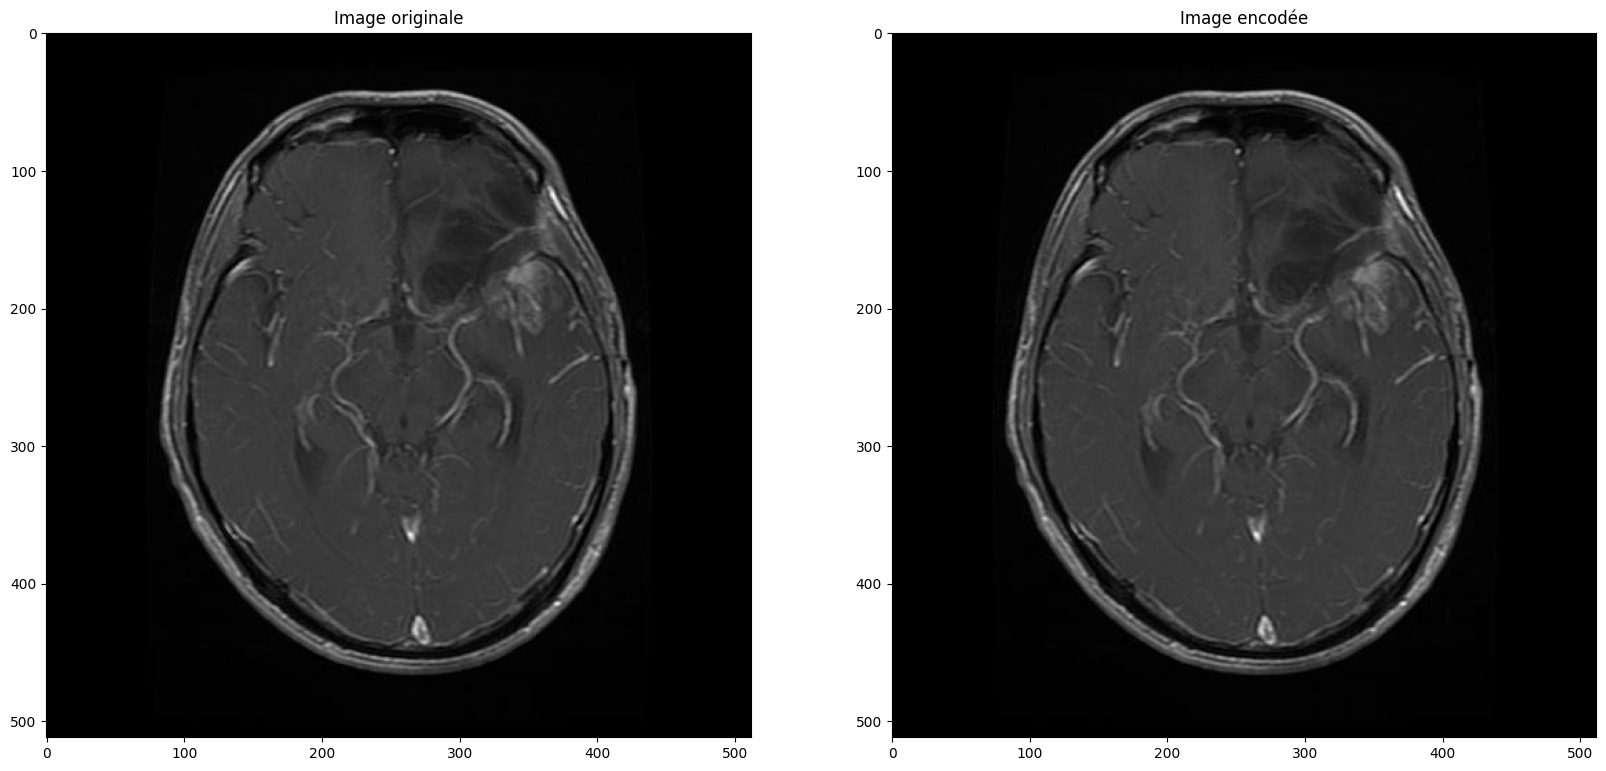

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 16))

axes[0].imshow(image)
axes[0].set_title("Image originale")
axes[1].imshow(encoded_image)
axes[1].set_title("Image encodée")
plt.show()

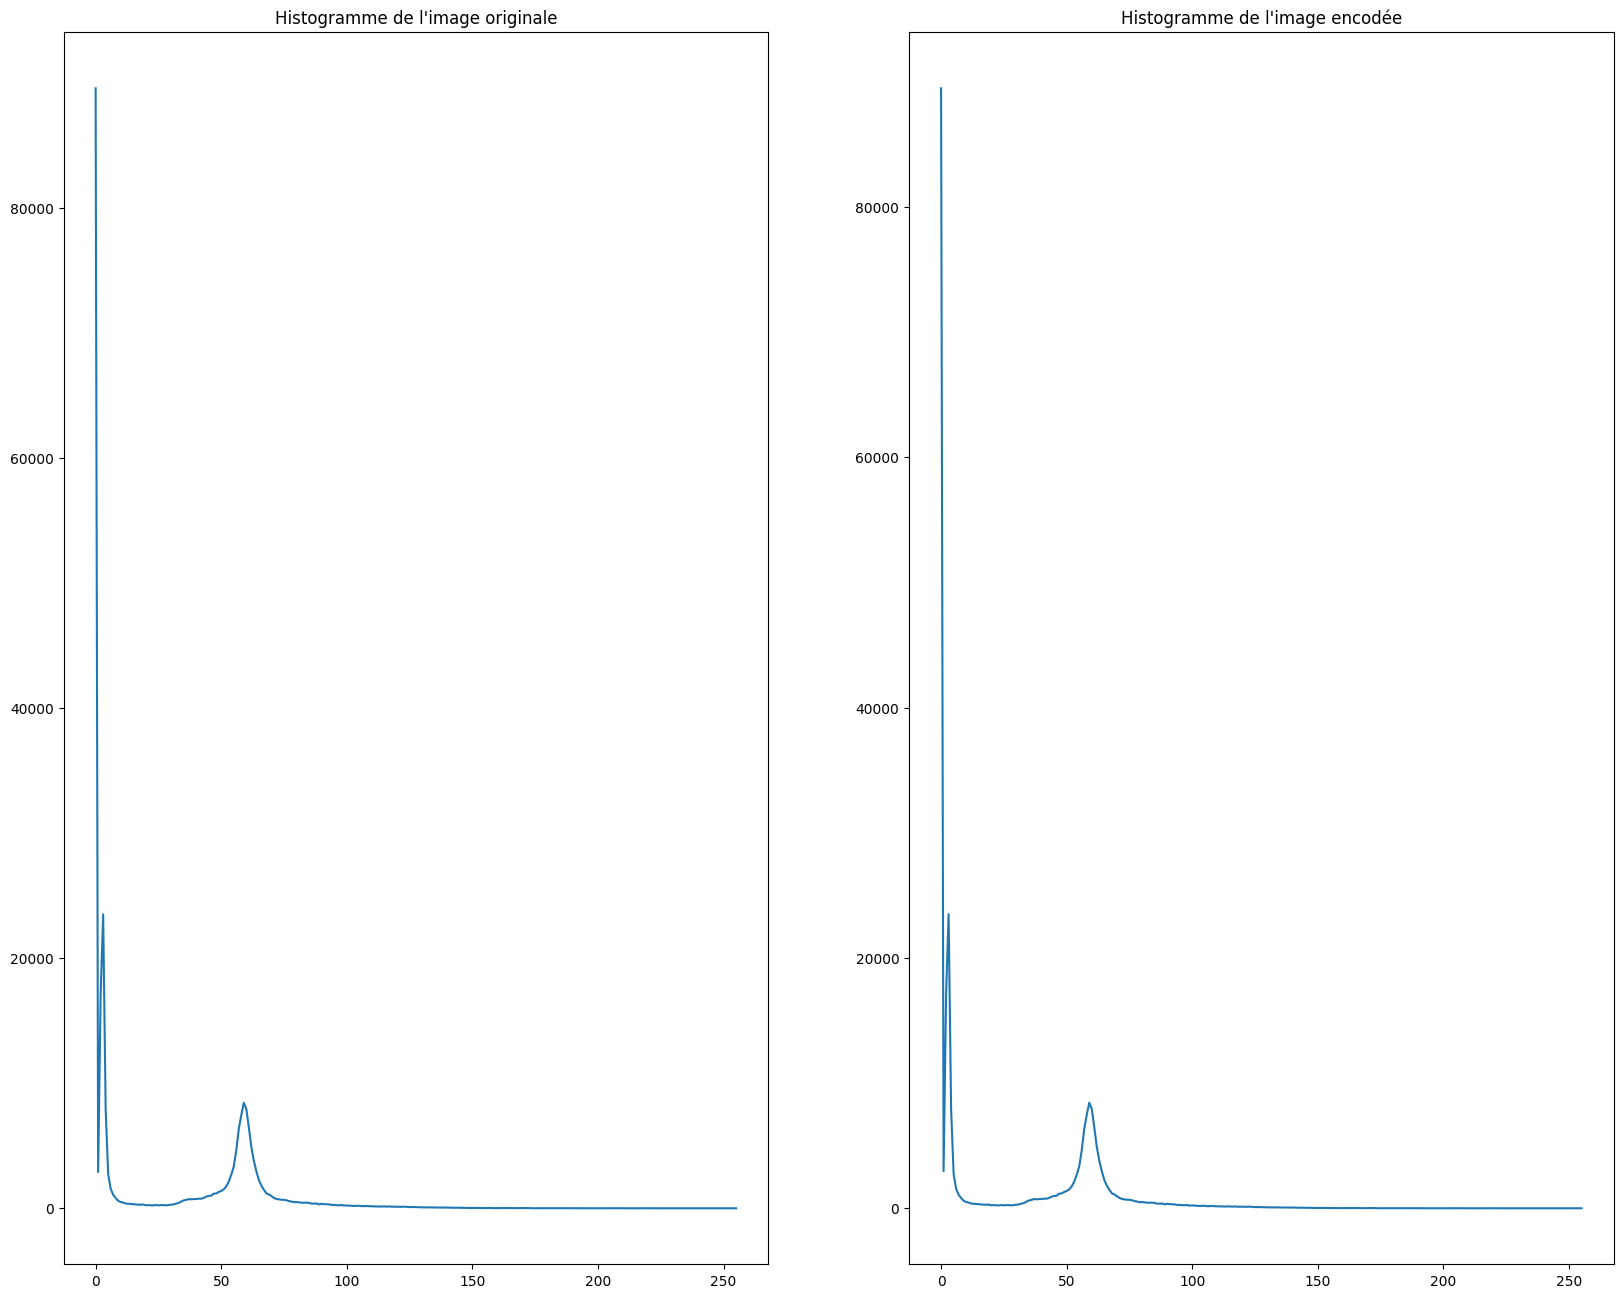

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 16))

img_gray = image.convert('L')
enc_gray = encoded_image.convert('L')
img_hist = img_gray.histogram()
enc_hist = enc_gray.histogram()

axes[0].plot(img_hist)
axes[0].set_title("Histogramme de l'image originale")
axes[1].plot(enc_hist)
axes[1].set_title("Histogramme de l'image encodée")
plt.show()

In [ ]:
import numpy as np
from PIL import Image

arr_orig = np.array(image)
arr_rec = np.array(encoded_image)

mse = np.mean((arr_orig - arr_rec) ** 2)

max_pixel_value = 255
psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))

print("PSNR:", psnr)

PSNR: 80.11512194779516


In [ ]:
message

'We are testing the encoding for image steganography'